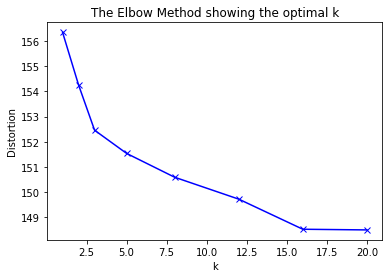

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

docWords=np.load("science2k-doc-word.npy")
distortions = []
K=[1,2,3,5,8,12,16,20]
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(docWords)
    distortions.append(sum(np.min(cdist(docWords, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / docWords.shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

We choose k = 3 with respect to the following reason. According to the elbow method, which determines the k by taking consideration of the percentage of variance explained as a function of the number of clusters. k = 5 is also a potential choice. However, by inspecting the top 10 example within each clusters when we use k = 3, k = 5. When k = 3, we find that there are two groups are biology-related and geography-related respectively, also a group which we are not able to identify which is very elusive. But when k = 5, there is clearly two groups that is biology-related that imply we get too large k. In addition, it is better to have uniform distributed groups among all clusters, and k = 3 has great performance where all three clusters has more than 400 instances, when k = 5 gives extremely worse situation where some group only has a couple of instances. Then we can claim the algorithm has somehow captures the related subject of the articles.

In [6]:
from sklearn.metrics import pairwise_distances
kmeanModel = KMeans(n_clusters=3).fit(docWords)
dists = pairwise_distances(kmeanModel.cluster_centers_, docWords)
closest = [ sorted(range(len(dist)), key=lambda i: dist[i] if kmeanModel.labels_[i] == index else 99999)[:10] for index, dist in enumerate(dists)]
print(closest)

[[1281, 1283, 139, 724, 587, 797, 1227, 715, 159, 1359], [997, 968, 541, 1314, 983, 767, 370, 704, 1000, 1032], [519, 574, 453, 499, 0, 90, 122, 123, 124, 777]]


In [10]:
f = open('science2k-titles.txt')
titles=[]
for line in f: titles.append(line)
# print(titles)
for k in range(3):
    print('----- Class',k,'-----')
    for i in closest[k]:
        print(titles[i])

----- Class 0 -----
"The Formation of Chondrules at High Gas Pressures in the Solar Nebula"

"Nitric Acid Trihydrate (NAT) in Polar Stratospheric Clouds"

"Population Dynamical Consequences of Climate Change for a Small Temperate Songbird"

"Subducted Seamount Imaged in the Rupture Zone of the 1946 Nankaido Earthquake"

"A Monoclinic Post-Stishovite Polymorph of Silica in the Shergotty Meteorite"

"Synthesis and Characterization of Helical Multi-Shell Gold Nanowires"

"Crossing the Hopf Bifurcation in a Live Predator-Prey System"

"Earth's Enigmatic Interface"

"Ambipolar Pentacene Field-Effect Transistors and Inverters"

"Reconstruction of the Amazon Basin Effective Moisture Availability over the past 14,000 Years"

----- Class 1 -----
"Requirement of NAD and SIR2 for Life-Span Extension by Calorie Restriction in Saccharomyces Cerevisiae"

"Suppression of Mutations in Mitochondrial DNA by tRNAs Imported from the Cytoplasm"

"Distinct Classes of Yeast Promoters Revealed by Differential

we find that there are two groups are biology-related and geography-related respectively, also a group which we are not able to identify which is very elusive. This could be used to construct a recommendation system. After one read the article, we can send him or her some other article that he or he may interested in.

(b)

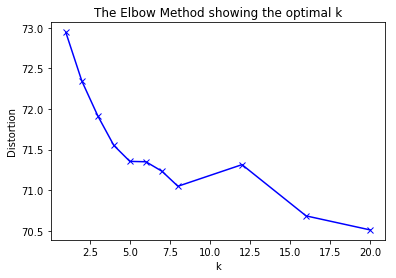

In [11]:
wordDocs=np.load("science2k-word-doc.npy")
distortions = []
K=[1,2,3,4,5,6,7,8,12,16,20]
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(wordDocs)
    distortions.append(sum(np.min(cdist(wordDocs, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / wordDocs.shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

According to the elbow method, we choose k = 5

In [12]:
kmeanModel = KMeans(n_clusters=5).fit(wordDocs)
dists = pairwise_distances(kmeanModel.cluster_centers_, wordDocs)
closest = [ sorted(range(len(dist)), key=lambda i: dist[i] if kmeanModel.labels_[i] == index else 99999)[:10] for index, dist in enumerate(dists)]
print(closest)

[[4744, 4403, 5023, 4230, 4764, 5371, 4278, 4921, 5295, 4256], [981, 1115, 1044, 1106, 545, 389, 963, 760, 759, 622], [3478, 1791, 2592, 1459, 1495, 1608, 2577, 1776, 2040, 1992], [11, 12, 3395, 3482, 2866, 4927, 5374, 4610, 2998, 3115], [5322, 5279, 5411, 5454, 4995, 4975, 4535, 5312, 5261, 5458]]


In [13]:
f = open('science2k-vocab.txt')
vocabs=[]
for line in f: vocabs.append(line)
for k in range(5):
    print('----- Class',k,'-----')
    for i in closest[k]:
        print(vocabs[i])

----- Class 0 -----
recalls

clinton

geneticist

security

fight

prize

finished

spending

campaign

rights

----- Class 1 -----
cooh

nh2

incubated

assays

promoter

kinase

polymerase

staining

purified

pcr

----- Class 2 -----
approximation

angular

finite

coherent

nonlinear

regime

calculation

diffraction

energies

equation

----- Class 3 -----
sciencemag

vol

introns

myc

p21

elisa

cdnas

triton

cyclin

immunoreactivity

----- Class 4 -----
lcts

aptamers

neas

trxr

dnag

proteorhodopsin

nompc

doxy

rory

lg268



The meaning of the words in different classes are elusive, it's hard to tell their classification.   
But we can use centroids of terms to represent terms and to tag the articles to facilitate searching.
Clustering terms is a dual problem of clustering documents. They are used in different areas. 